使用k-Means算法对AirPassengers的年度标准曲线进行聚类

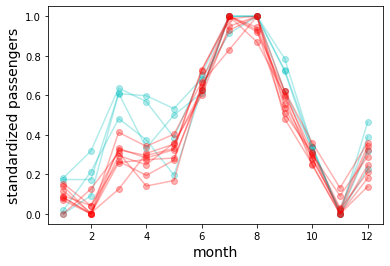

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
# 加载数据、转换并进行标准化处理
passengers = pd.read_csv("http://image.cador.cn/data/AirPassengers.csv")
data = list()
tmp = passengers.groupby('year').filter(lambda block:data.append([block.iloc[0,0]]+block.passengers.values.tolist()))
data = pd.DataFrame(data)
data.set_index(data[0],inplace=True)
data.drop(columns=0,inplace=True)
# 标准化时，采取按行标准化的方法，即每行中，都是0和1,分别表示最大和最小，以此方式来分析曲线模式
data = data.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)),axis=1)

#假如我要构造一个聚类数为2的聚类器
km_cluster = KMeans(n_clusters=2, max_iter=300, n_init=40, init='k-means++')
km_cluster.fit(data)
data['cluster']=km_cluster.labels_

# 绘制聚类结果曲线（两个类别）
import matplotlib.pyplot as plt
%matplotlib inline
styles = ['co-','ro-']
tmp = data.apply(lambda row:plt.plot([x+1 for x in range(12)],[row[x+1] for x in range(12)],styles[int(row.cluster)],alpha=0.3),axis=1)
plt.xlabel("month",fontsize=14)
plt.ylabel("standardized passengers",fontsize=14)
plt.show()